In [1]:
import axelrod as axl

In [2]:
# make and play tournament
import pandas as pd
import sys
sys.path.append("../") # act as if one directory up

from src.functions import *
from src.custom_strats import *
from src.misc_functions import *
from src.strategy_descriptions import *

# run a basic tournament
players = [axl.Cooperator(), axl.Defector(),
           axl.TitForTat(), axl.Grudger(), example()]
tournament = axl.Tournament(players, turns=10, repetitions=3)
results = tournament.play()

Analysing: 100%|██████████| 25/25 [00:00<00:00, 308.64it/s]


In [3]:
summaryDf = pd.DataFrame(results.summarise())

# print columns 0:5
print(summaryDf.iloc[:, 0:5])

   Rank         Name  Median_score  Cooperation_rating  Wins
0     0  Tit For Tat         2.475               0.775   0.0
1     1      Grudger         2.475               0.775   0.0
2     2      example         2.475               0.775   0.0
3     3     Defector         2.300               0.000   4.0
4     4   Cooperator         2.250               1.000   0.0


In [4]:
# check datatype of results
print(type(results))
print(type(tournament))

<class 'axelrod.result_set.ResultSet'>
<class 'axelrod.tournament.Tournament'>


In [5]:
print(resultsToDF(results, tournament))
df = resultsToDF(results, tournament)

   Rank         Name  Median_score  Cooperation_rating  Wins  Total score  \
0     0  Tit For Tat         2.475               0.775   0.0          270   
1     1      Grudger         2.475               0.775   0.0          276   
2     2      example         2.475               0.775   0.0          297   
3     3     Defector         2.300               0.000   4.0          297   
4     4   Cooperator         2.250               1.000   0.0          297   

   Avg. score per turn  Score Std. deviation  Normalised Score  
0                  9.0                   0.0              1.80  
1                  9.2                   0.0              1.84  
2                  9.9                   0.0              1.98  
3                  9.9                   0.0              1.98  
4                  9.9                   0.0              1.98  


# Plots

In [21]:
## Functions being tested:
def plot_bar(df, title="Bar chart of total scores"):
    """
    Plots a bar chart of the total scores for each strategy in the tournament.
    :param df: Pandas DataFrame containing the results of the tournament
    :param title: Title of the plot (default: "Bar chart of total scores")
    :return: None
    """
    fig, ax = plt.subplots()
    ax.bar(df["Name"], df["Total score"])
    plt.xticks(rotation=90)
    ax.set_xlabel("Strategy")
    ax.set_ylabel("Total score")
    ax.set_title(title)
    plt.show()


def plot_heatmap(df, title="Heatmap of scores for each pair of strategies"):
    """
    Plots a heatmap of the scores for each pair of strategies in the tournament.
    :param df: Pandas DataFrame containing the results of the tournament
    :param title: Title of the plot (default: "Heatmap of scores for each pair of strategies")
    :return: None
    """
    pivot = df.pivot(index="Player 1", columns="Player 2", values="Score")
    fig, ax = plt.subplots()
    im = ax.imshow(pivot, cmap='Blues')
    ax.set_xticks(range(len(pivot.columns)))
    ax.set_xticklabels(pivot.columns, rotation=90)
    ax.set_yticks(range(len(pivot.index)))
    ax.set_yticklabels(pivot.index)
    ax.set_title(title)
    plt.colorbar(im)
    plt.show()


def plot_box_plot(df, title="Box plot of scores for each strategy"):
    """
    Plots a box plot of the scores for each strategy in the tournament.
    :param df: Pandas DataFrame containing the results of the tournament
    :param title: Title of the plot (default: "Box plot of scores for each strategy")
    :return: None
    """
    fig, ax = plt.subplots()
    ax.boxplot(df["Score"], labels=df["Name"])
    ax.set_xlabel("Strategy")
    ax.set_ylabel("Score")
    ax.set_title(title)
    plt.show()


def plot_line_chart(df, player_1=None, player_2=None, title="Line chart of scores over time"):
    """
    Plots a line chart of the scores over time for a single match between two strategies.
    If player_1 and player_2 are not specified, the first two rows in the DataFrame will be used.
    :param df: Pandas DataFrame containing the results of the tournament
    :param player_1: Index of the first row (default: None)
    :param player_2: Index of the second row (default: None)
    :param title: Title of the plot (default: "Line chart of scores over time")
    :return: None
    """
    if player_1 is None or player_2 is None:
        if len(df) < 2:
            raise ValueError(
                "DataFrame does not contain data for at least two players")
        player_1, player_2 = df.index[:2]

    subset = df.loc[[player_1, player_2]]
    fig, ax = plt.subplots()
    ax.plot(subset["Turn"], subset["Score"],
            label=f"{subset.iloc[0]['Name']} vs {subset.iloc[1]['Name']}")
    ax.set_xlabel("Turn")
    ax.set_ylabel("Score")
    ax.set_title(title)
    ax.legend()
    plt.show()


def plot_all(df, tournament, title_prefix="Tournament Results"):
    """
    Creates all visualizations for the tournament results.
    :param df: Pandas DataFrame containing the results of the tournament
    :param tournament: Tournament object from Axelrod
    :param title_prefix: Prefix to use for all plot titles (default: "Tournament Results")
    :return: None
    """
    # Create bar chart of total scores
    title = title_prefix + " - Bar chart of total scores"
    plot_bar_chart(df, title=title)

    # Create heatmap of scores for each pair of strategies
    title = title_prefix + " - Heatmap of scores for each pair of strategies"
    plot_heatmap(df, title=title)

    # Create box plot of scores for each strategy
    title = title_prefix + " - Box plot of scores for each strategy"
    plot_box_plot(df, title=title)

    # Create line chart of scores over time for a single match
    title = title_prefix + " - Line chart of scores over time"
    if len(df) < 2:
        player_1 = player_2 = None
    else:
        player_1, player_2 = df.index[:2]
    plot_line_chart(df, player_1, player_2, title=title)


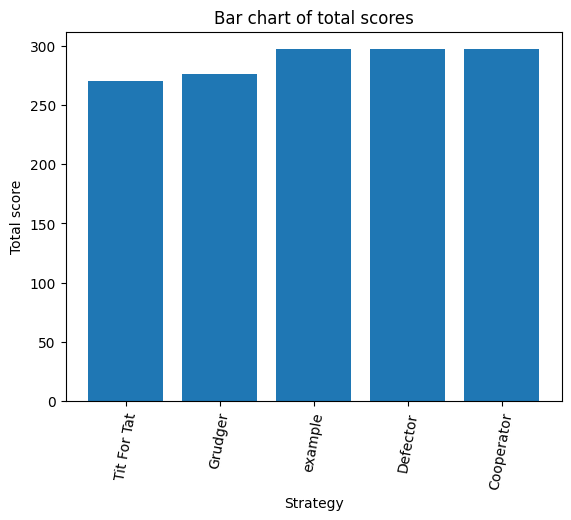

In [22]:
plot_bar(df)

In [20]:
plot_heatmap(df)

KeyError: 'Player 1'

In [ ]:
tournament = axl.Tournament(players)
results = tournament.play()

Analysing: 100%|██████████| 25/25 [00:00<00:00, 260.42it/s]


NameError: name 'plot' is not defined

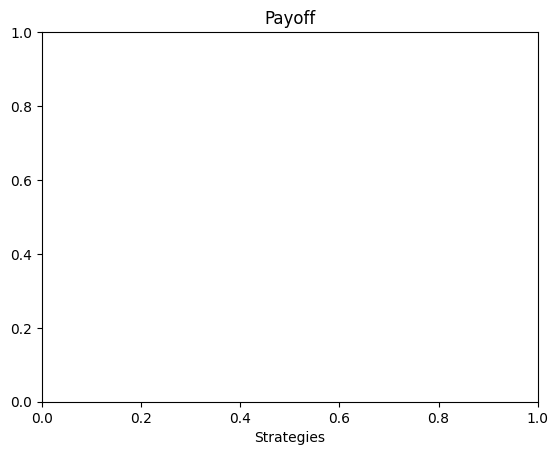

In [ ]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()
title = ax.set_title('Payoff')
xlabel = ax.set_xlabel('Strategies')
p = plot.boxplot(ax=ax)
p.show()


# plot = axl.Plot(results)
# p = plot.boxplot()
# p.show()

# p = p.winplot()
# p.show()

# p = p.payoff()
# p.show()

In [ ]:
players = [axl.Cooperator(), axl.Defector(),
axl.TitForTat(), axl.Grudger()]
mp = axl.MoranProcess(players, seed=1)
populations = mp.play()
mp.winning_strategy_name


'Tit For Tat'

In [ ]:

# plot match results
def PlotTournamentResults(results):
    ## format is a list of tuples
    ## each tuple is a turn
    return None




[Tit For Tat, chaotic_clairvoyant]
[(C, C), (C, D), (D, D), (C, D), (D, C), (C, D), (C, D), (D, D), (D, C), (C, C)]
[(3, 3), (0, 5), (1, 1), (0, 5), (5, 0), (0, 5), (0, 5), (1, 1), (5, 0), (3, 3)]


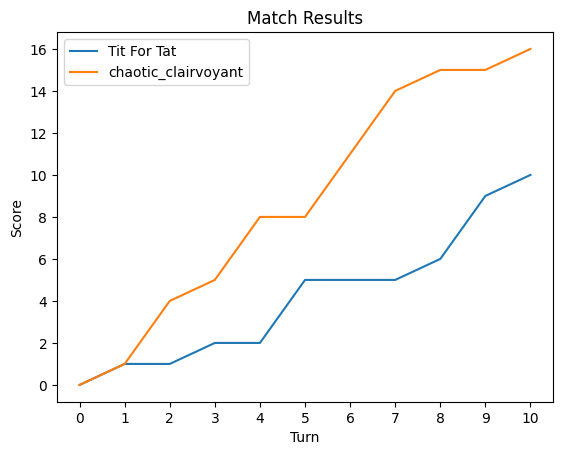

Match Results:
---------------------------------------------------
|  Turn |   Tit For Tat  |   chaotic_clairvoyant  |
---------------------------------------------------
|   1   |        D       |            D           |
|   2   |        C       |            C           |
|   3   |        C       |            D           |
|   4   |        D       |            D           |
|   5   |        D       |            C           |
|   6   |        C       |            C           |
|   7   |        C       |            C           |
|   8   |        C       |            D           |
|   9   |        C       |            C           |
|   10  |        D       |            D           |
---------------------------------------------------


In [ ]:
from src.functions import *
players = [axl.TitForTat(), chaotic_clairvoyant()]
match = axl.Match(players=players,
                  turns=10, noise=0.2, prob_end=0, seed=42)
type(match.play())

print(players)
print(match.play())
print(match.scores())

PlotMatchResults(match.scores(), player1=players[0].name, player2=players[1].name)
PrintMatchResults(match.play(), player1=players[0].name, player2=players[1].name)


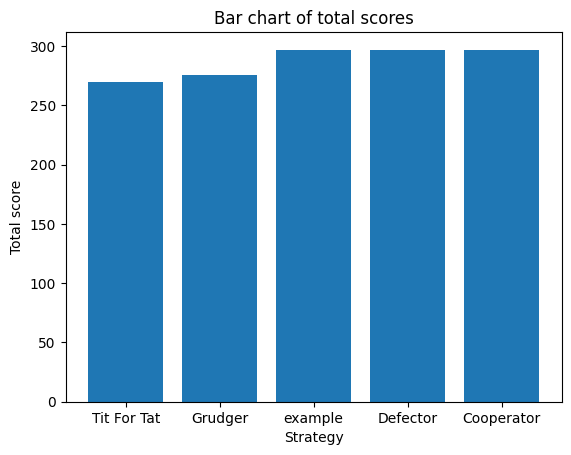

In [ ]:
plot_bar_chart(df)

KeyError: 'Turn'

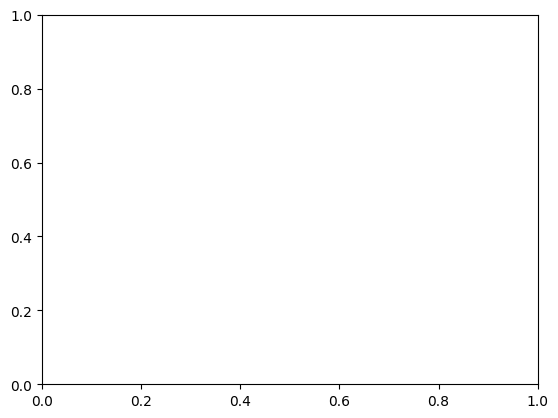

In [ ]:
plot_line_chart(df)

In [ ]:
plot_heatmap(df)

In [ ]:
plot_box_plot(df)